# CYBER SECURITY

DESCRIPTION

Problem Statement:

Book-My-Show will enable the ads on their website, but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not.

Dataset Details: 

The input dataset contains an 11k sample corresponding to the 11k URL. Each sample contains 32 features that give a different and unique description of URL ranging from -1,0,1.

 1: Phishing

 0: Suspicious

 1: Legitimate

The sample could be either legitimate or phishing.

### Project Task: Week 1

Exploratory Data Analysis:

Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 

Determine the number of samples present in the data, unique elements in all the features. 

Check if there is any null value in any features. 

Correlation of features and feature selection:

Next, we have to find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.

In [1]:
## Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Read Input file
df = pd.read_csv(r"C:\Users\ensar\Documents\Capstone\1611230667_dataset\dataset.csv")
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
# Check the shape(rows & cols) of the dataset
df.shape

(11055, 32)

In [4]:
# Column info & to check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [5]:
# Check the target column for unique values
df["Result"].unique()

array([-1,  1], dtype=int64)

D:\Software\Anaconda3\envs\Sara\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

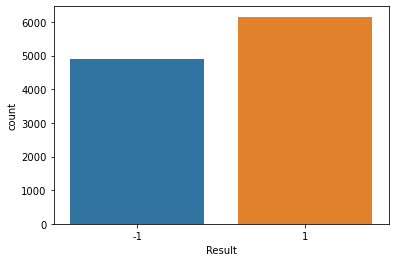

In [6]:
# Plot the distribution of target column
sns.countplot(df["Result"])

In [7]:
# Check uniqueness of each column
df.nunique()

index                          11055
having_IPhaving_IP_Address         2
URLURL_Length                      3
Shortining_Service                 2
having_At_Symbol                   2
double_slash_redirecting           2
Prefix_Suffix                      2
having_Sub_Domain                  3
SSLfinal_State                     3
Domain_registeration_length        2
Favicon                            2
port                               2
HTTPS_token                        2
Request_URL                        2
URL_of_Anchor                      3
Links_in_tags                      3
SFH                                3
Submitting_to_email                2
Abnormal_URL                       2
Redirect                           2
on_mouseover                       2
RightClick                         2
popUpWidnow                        2
Iframe                             2
age_of_domain                      2
DNSRecord                          2
web_traffic                        3
P

In [8]:
# Drop the index column which is not useful for our process
df = df.drop(["index"], axis=1)

In [9]:
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


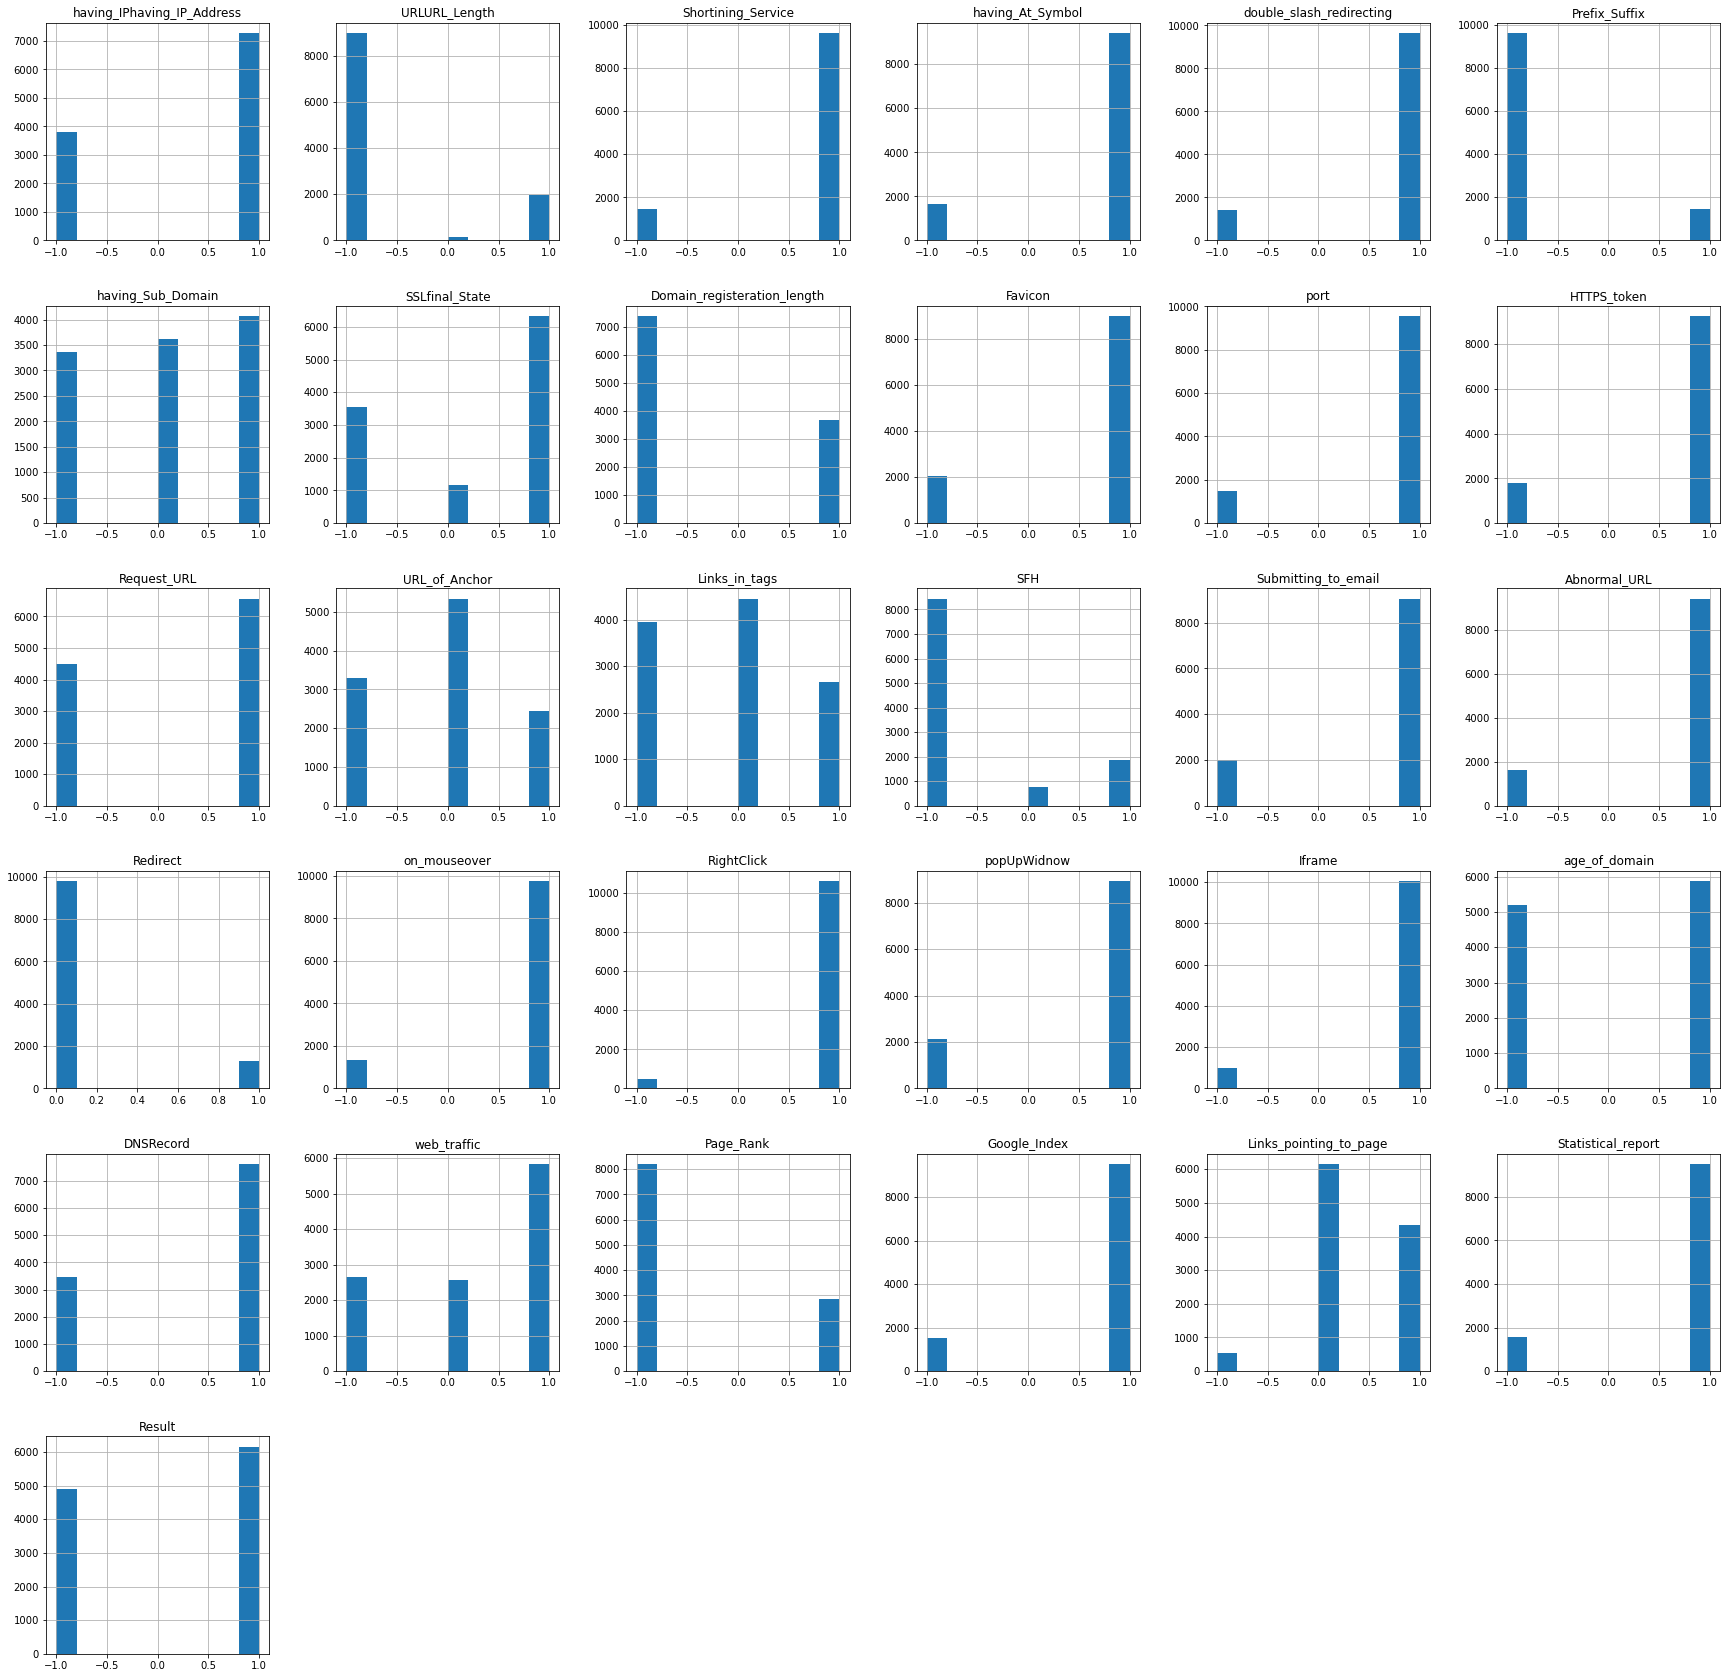

In [10]:
# Plot histogram for df
df.hist(figsize=[30,30])
plt.show()

In [11]:
# Check correlation between features and target column in numbers
df.corr()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IPhaving_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
Favicon,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,...,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917,-0.000280


<AxesSubplot:>

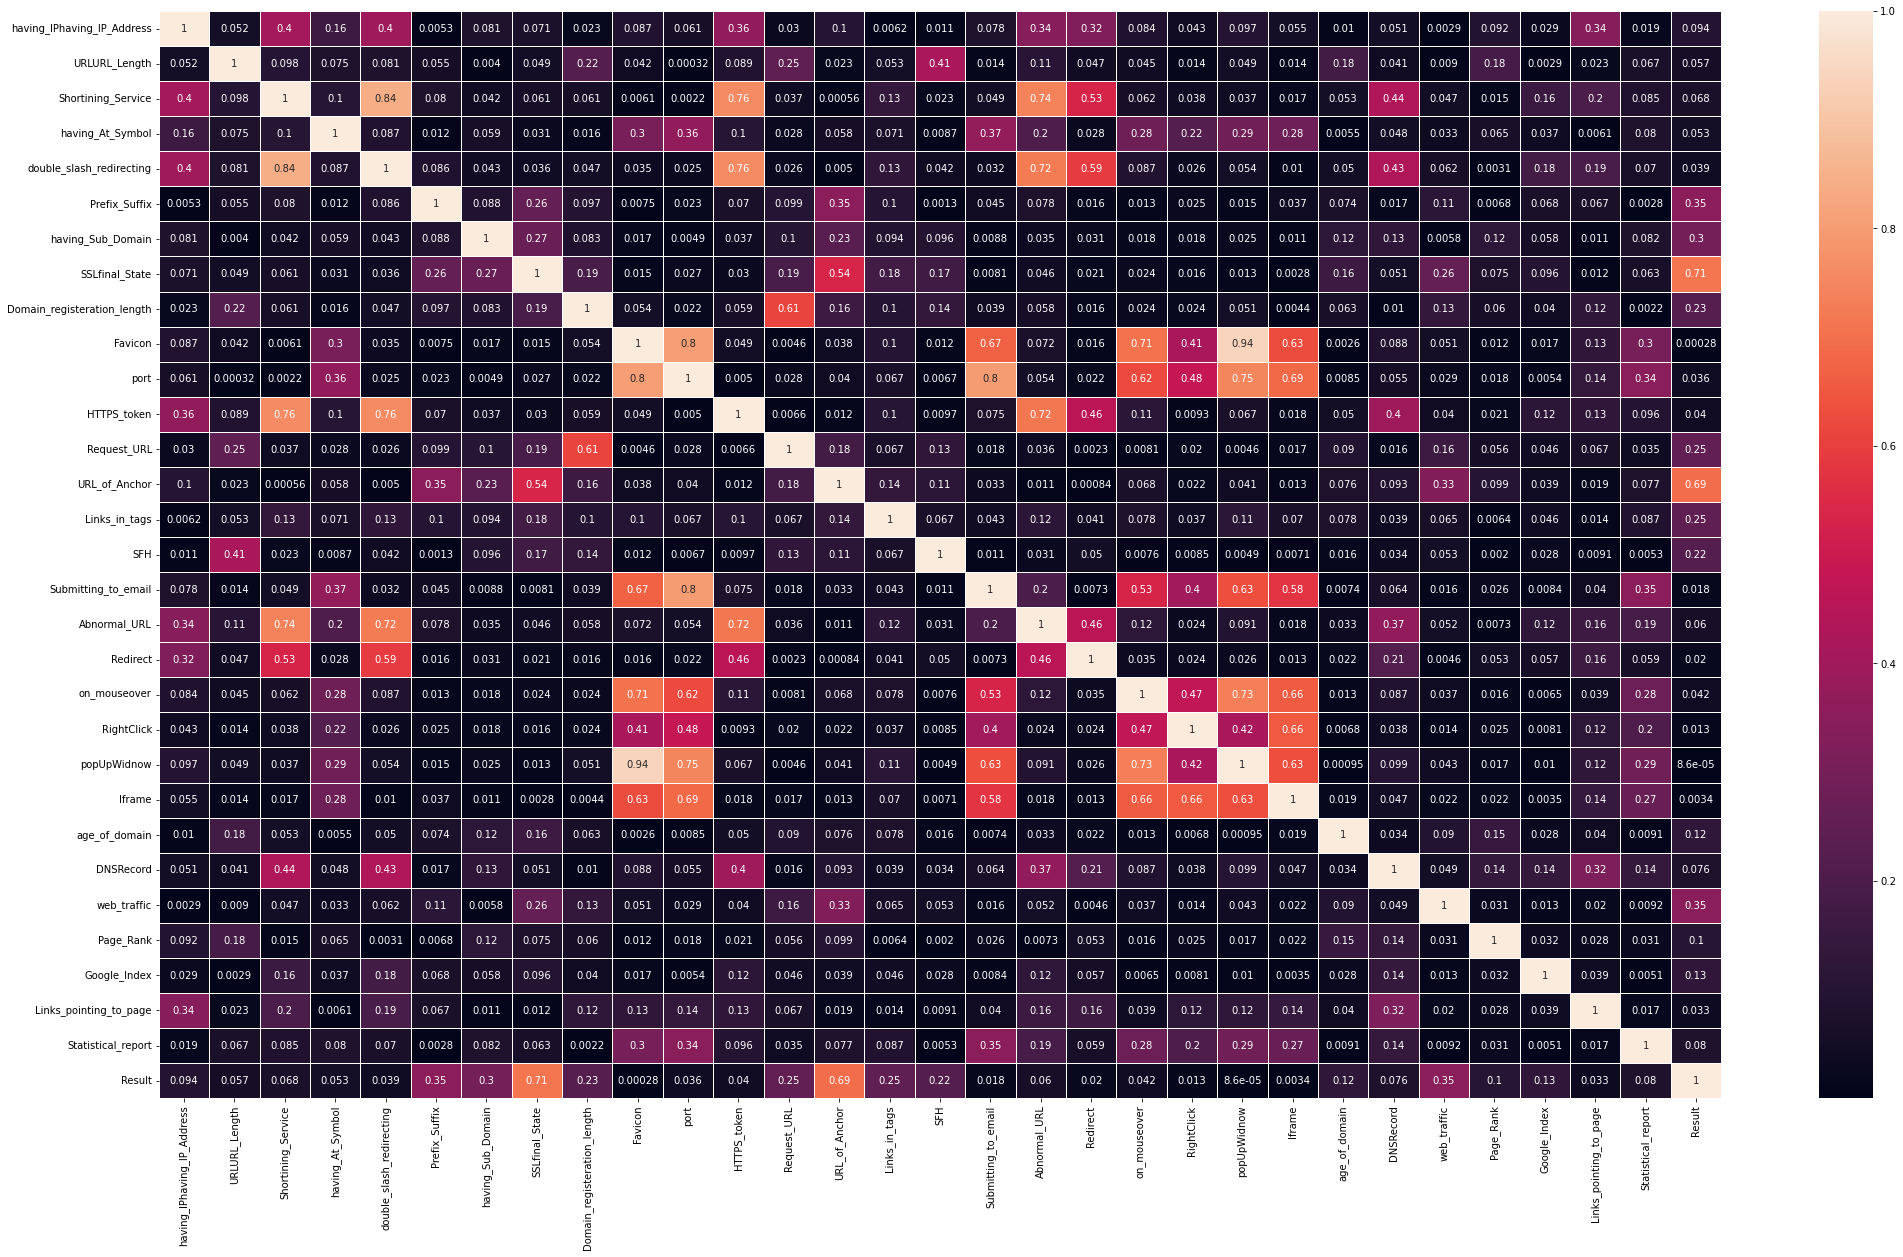

In [12]:
# Plotting heatmap to visualize the correlation between features
fig, ax = plt.subplots(figsize=(35,20))
sns.heatmap(df.corr().abs(),annot=True, linewidths=0.8)

#### Inference from heatmap for correlated features

Lets consider 70% or 0.7 as the threshold of correlation 

From the heatmap, we can see the features :

1.SSLFinal_state & URL_of_Anchor are highly correlated with target Result

2.Shortining_Service is highly correlated with double_slash_redirecting, HTTPS_token,Abnormal_URL
3.double_slash_redirecting is highly correlated with Shortining_Service, HTTPS_token,Abnormal_URL
4.Favicon is highly correlated with port, on_mouseover, popUpWindow
5.port is highly correlated with favicon,Submitting_to_email, popUpWindow
6.HTTPS_token is highly correlated with Shortining_Service, double_slash_redirecting,Abnormal_URL
7.Submitting_to_email is highly correlated with port
8.Abnormal_URL is highly correlated with Shortining_Service, double_slash_redirecting, HTTPS_token
9.on_mouseover is highly correlated with favicon, popUpWindow
10.popUpWindow is highly correlated with favicon, port, on_mouseover

so,
Among these we can have only one feature - 
Shortining_Service, double_slash_redirecting, HTTPS_token, Abnormal_URL => Shortining_Service
we can drop other three => double_slash_redirecting, HTTPS_token, Abnormal_URL

Among these we can have only one feature - 
favicon, port, on_mouseover, popUpWindow  => favicon
we can drop other three => port, on_mouseover, popUpWindow

In [13]:
# Dropping those selected 6 highly correlated columns
filtered_df = df.drop(["double_slash_redirecting", "HTTPS_token", "Abnormal_URL","port", 
              "on_mouseover", "popUpWidnow"], axis=1)

In [14]:
filtered_df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,Request_URL,...,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,-1,0,1,-1,1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,-1,-1,-1,-1,1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,-1,-1,-1,1,1,-1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,-1,1,1,-1,1,1,...,1,1,-1,-1,0,-1,1,1,1,1


<AxesSubplot:>

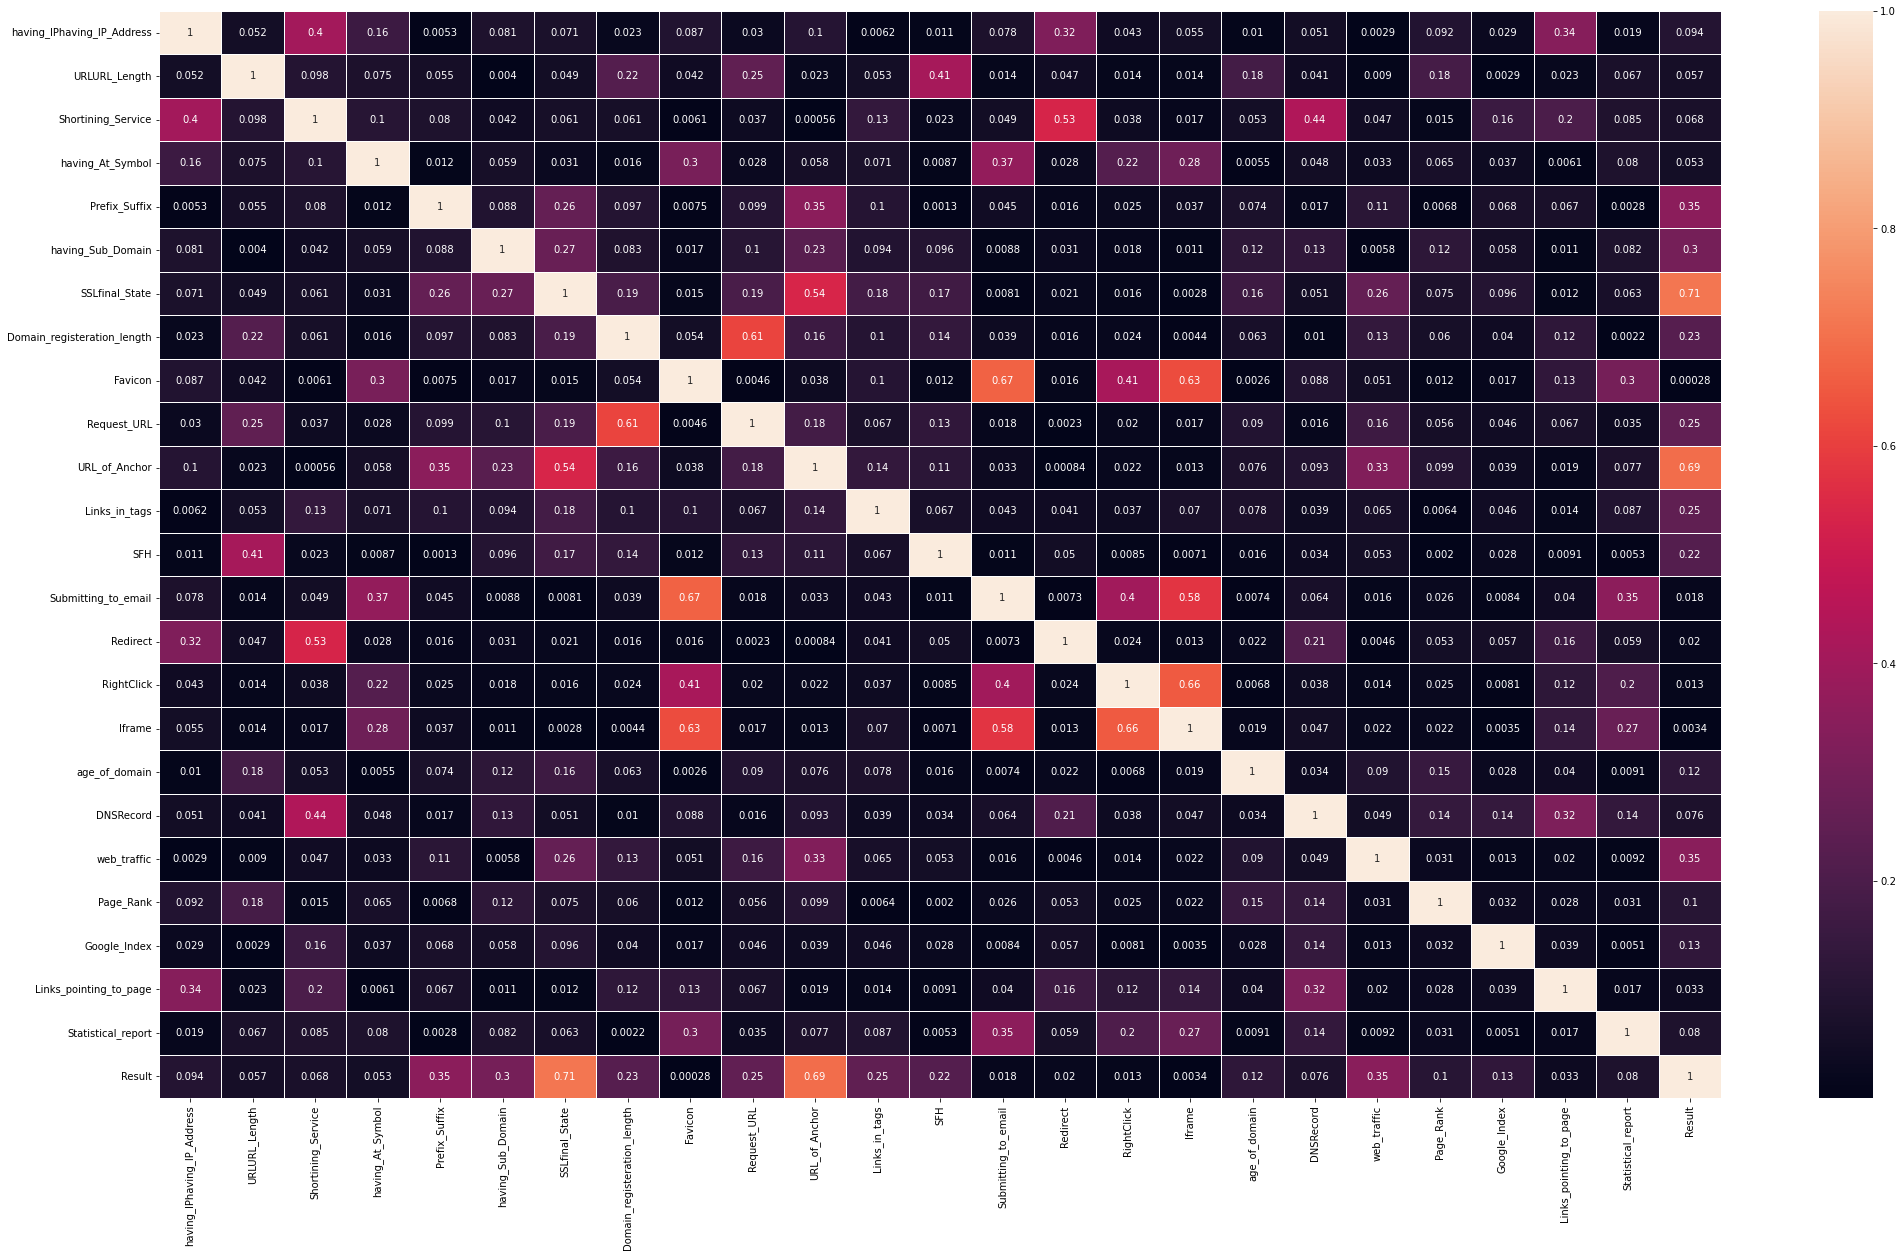

In [15]:
# Checking heatmap again to see if we have any other strong correlation among features
fig, ax = plt.subplots(figsize=(35,20))
sns.heatmap(filtered_df.corr().abs(),annot=True, linewidths=0.8)

#### Project Task: Week 2

Building Classification Model

Finally, build a robust classification system that classifies whether the URL sample is a phishing site or not.

Build classification models using a binary classifier to detect malicious or phishing URLs.

Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

Validate the accuracy of data by the K-Fold cross-validation technique.

The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.

In [16]:
# Defining x(features) & y(target) 
x = filtered_df.drop(["Result"],axis=1)
y = filtered_df["Result"]

In [17]:
# Splitting data into train & test
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27000)

In [19]:
# Checking shape
x_train.shape, x_test.shape

((8844, 24), (2211, 24))

In [20]:
y_train.shape, y_test.shape

((8844,), (2211,))

#### Logistic Regression

In [33]:
# Create model
from sklearn.linear_model import LogisticRegression

In [34]:
LogReg = LogisticRegression()

In [35]:
LogReg.fit(x_train,y_train)

LogisticRegression()

In [36]:
# Predict
y_predict = LogReg.predict(x_test)
y_predict[0:5]

array([ 1, -1,  1,  1,  1], dtype=int64)

In [37]:
# Accuracy Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix

In [38]:
print("Accuracy score:", accuracy_score(y_test, y_predict))
print("F1 score:", f1_score(y_test, y_predict))
print("Precision score:", precision_score(y_test, y_predict))

Accuracy score: 0.926729986431479
F1 score: 0.9347826086956522
Precision score: 0.9170616113744076


In [39]:
print("Confusion Matrix:")
confusion_matrix(y_test, y_predict)

Confusion Matrix:


array([[ 888,  105],
       [  57, 1161]], dtype=int64)

In [40]:
# Plotting ROC Curve
from sklearn.metrics import roc_curve

In [41]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

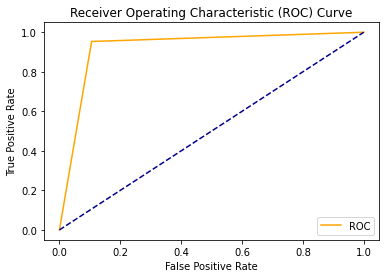

In [43]:
plot_roc_curve(fpr, tpr)

In [44]:
# Check accuracy by K-Fold cross-validation technique
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(LogReg,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))

Cross Validation Scores are [0.92492085 0.92763455 0.92492085 0.91858887 0.923564  ]


### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
RandForst = RandomForestClassifier(n_estimators = 500)
RandForst.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [46]:
# Prediction
y_predict = RandForst.predict(x_test)
y_predict[0:5]

array([ 1, -1,  1,  1,  1], dtype=int64)

In [47]:
# Accuracy Metrics
print("Accuracy score:", accuracy_score(y_test, y_predict))
print("F1 score:", f1_score(y_test, y_predict))
print("Precision score:", precision_score(y_test, y_predict))

Accuracy score: 0.9728629579375848
F1 score: 0.9756493506493507
Precision score: 0.9646869983948636


In [48]:
print("Confusion Matrix:")
confusion_matrix(y_test, y_predict)

Confusion Matrix:


array([[ 949,   44],
       [  16, 1202]], dtype=int64)

In [49]:
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

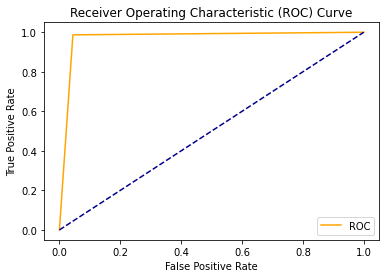

In [50]:
plot_roc_curve(fpr, tpr)

In [51]:
# Check accuracy by K-Fold cross-validation technique
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(RandForst,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))

Cross Validation Scores are [0.98281321 0.97829037 0.97829037 0.96155586 0.94391678]


### Decision Tree Classfier

In [52]:
from sklearn.tree import DecisionTreeClassifier
DcsnTree = DecisionTreeClassifier()
DcsnTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
# Prediction
y_predict = DcsnTree.predict(x_test)
y_predict[0:5]

array([ 1, -1,  1,  1,  1], dtype=int64)

In [55]:
# Accuracy Metrics
print("Accuracy score:", accuracy_score(y_test, y_predict))
print("F1 score:", f1_score(y_test, y_predict))
print("Precision score:", precision_score(y_test, y_predict))

Accuracy score: 0.9620081411126187
F1 score: 0.9656301145662848
Precision score: 0.9624796084828712


In [56]:
print("Confusion Matrix:")
confusion_matrix(y_test, y_predict)

Confusion Matrix:


array([[ 947,   46],
       [  38, 1180]], dtype=int64)

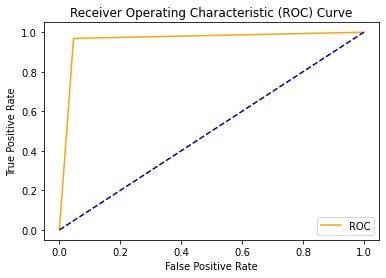

In [58]:
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plot_roc_curve(fpr, tpr)

In [59]:
# Check accuracy by K-Fold cross-validation technique
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(DcsnTree,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))

Cross Validation Scores are [0.97919493 0.97648123 0.96155586 0.94165536 0.90230665]


### Naive Bayes Classifier

In [60]:
from sklearn.naive_bayes import GaussianNB
NavBys = GaussianNB()
NavBys.fit(x_train, y_train)

GaussianNB()

In [61]:
# Prediction
y_predict = NavBys.predict(x_test)
y_predict[0:5]

array([ 1, -1,  1, -1, -1], dtype=int64)

In [62]:
# Accuracy Metrics
print("Accuracy score:", accuracy_score(y_test, y_predict))
print("F1 score:", f1_score(y_test, y_predict))
print("Precision score:", precision_score(y_test, y_predict))

Accuracy score: 0.6132971506105834
F1 score: 0.4592030360531309
Precision score: 1.0


In [63]:
print("Confusion Matrix:")
confusion_matrix(y_test, y_predict)

Confusion Matrix:


array([[993,   0],
       [855, 363]], dtype=int64)

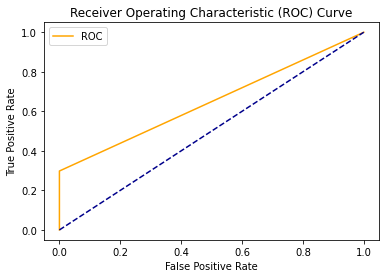

In [64]:
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plot_roc_curve(fpr, tpr)

In [65]:
# Check accuracy by K-Fold cross-validation technique
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(NavBys,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))

Cross Validation Scores are [0.59656264 0.60470375 0.61103573 0.61374943 0.58254184]


### Support Vector Machines

In [68]:
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(x, y)

In [70]:
# Prediction
y_predict = svc.predict(x_test)
y_predict[0:5]

array([ 1, -1,  1,  1,  1], dtype=int64)

In [71]:
# Accuracy Metrics
print("Accuracy score:", accuracy_score(y_test, y_predict))
print("F1 score:", f1_score(y_test, y_predict))
print("Precision score:", precision_score(y_test, y_predict))

Accuracy score: 0.9285391225689733
F1 score: 0.9364951768488746
Precision score: 0.9173228346456693


In [72]:
print("Confusion Matrix:")
confusion_matrix(y_test, y_predict)

Confusion Matrix:


array([[ 888,  105],
       [  53, 1165]], dtype=int64)

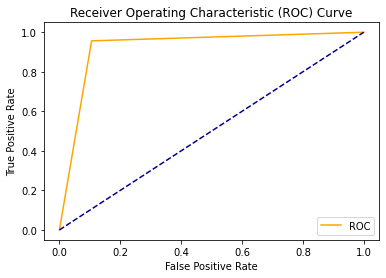

In [73]:
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plot_roc_curve(fpr, tpr)

In [74]:
# Check accuracy by K-Fold cross-validation technique
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(NavBys,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))

Cross Validation Scores are [0.59656264 0.60470375 0.61103573 0.61374943 0.58254184]


### K-Nearest Neighbors Classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [76]:
# Prediction
y_predict = knn.predict(x_test)
y_predict[0:5]

array([ 1, -1,  1,  1,  1], dtype=int64)

In [77]:
# Accuracy Metrics
print("Accuracy score:", accuracy_score(y_test, y_predict))
print("F1 score:", f1_score(y_test, y_predict))
print("Precision score:", precision_score(y_test, y_predict))

Accuracy score: 0.9425599276345545
F1 score: 0.9485204702067288
Precision score: 0.9367493995196157


In [78]:
print("Confusion Matrix:")
confusion_matrix(y_test, y_predict)

Confusion Matrix:


array([[ 914,   79],
       [  48, 1170]], dtype=int64)

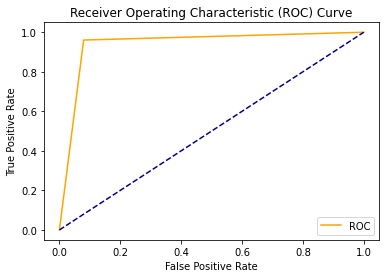

In [79]:
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plot_roc_curve(fpr, tpr)

In [80]:
# Check accuracy by K-Fold cross-validation technique
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(NavBys,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))

Cross Validation Scores are [0.59656264 0.60470375 0.61103573 0.61374943 0.58254184]


### Summary

Logistic Regression	
    Accuracy score: 0.926729986431479
    F1 score: 0.9347826086956522
    Precision score: 0.9170616113744076
    Cross Validation Scores are [0.92492085 0.92763455 0.92492085 0.91858887 0.923564  ]

Random Forest Classifier
    Accuracy score: 0.9728629579375848
    F1 score: 0.9756493506493507
    Precision score: 0.9646869983948636
    Cross Validation Scores are [0.98281321 0.97829037 0.97829037 0.96155586 0.94391678]

Decision Tree Classfier
    Accuracy score: 0.9620081411126187
    F1 score: 0.9656301145662848
    Precision score: 0.9624796084828712
    Cross Validation Scores are [0.97919493 0.97648123 0.96155586 0.94165536 0.90230665]

Naive Bayes Classifier
    Accuracy score: 0.6132971506105834
    F1 score: 0.4592030360531309
    Precision score: 1.0
    ross Validation Scores are [0.59656264 0.60470375 0.61103573 0.61374943 0.58254184]

Support Vector Machines
    Accuracy score: 0.9285391225689733
    F1 score: 0.9364951768488746
    Precision score: 0.9173228346456693
    Cross Validation Scores are [0.59656264 0.60470375 0.61103573 0.61374943 0.58254184]

K-Nearest Neighbors Classifier
    Accuracy score: 0.9425599276345545
    F1 score: 0.9485204702067288
    Precision score: 0.9367493995196157
    Cross Validation Scores are [0.59656264 0.60470375 0.61103573 0.61374943 0.58254184]

### Conclusion

In [ ]:
# Naive Bayes Classifier is the least performing algorithm for this business problem

# Though SVM & Knn Classifiers are good at accuracy scores, they score less in Cross Validation

# Logistic Regression & Decision Tree Classfier have the decent scores 

#### Random Forest Classifier ####  is the top scorer in all the means and hence very good for this problem statement